In [2]:
import pandas as pd
import os
import numpy as np

In [3]:
base_path = 'D:/KHH/team_project/ML_data/'

# 전처리한 csv파일을 하나의 데이터 프레임으로 concat 

In [4]:
ML_df = pd.DataFrame([])

In [5]:
for csv_name in os.listdir(base_path):
    print(csv_name + '병합중')
    if not('._' in csv_name or 'ML_X_data.csv' in csv_name or 'ML_Y_data.csv' in csv_name or 'ML_proseced_data.csv' in csv_name) : # 임시파일 거르는 용도
        ML_df = pd.concat([pd.read_csv(base_path + csv_name), ML_df], axis=0, ignore_index=True)
ML_df.head()

babel_01.csv병합중
babel_02.csv병합중
babel_03.csv병합중
babel_04.csv병합중
babel_05.csv병합중
babel_06.csv병합중
babel_07.csv병합중
babel_08.csv병합중
babel_09.csv병합중
babel_10.csv병합중
babel_11.csv병합중
babel_12.csv병합중
babel_13.csv병합중
babel_14.csv병합중
babel_15.csv병합중
body_02.csv병합중
body_03.csv병합중
body_04.csv병합중
body_05.csv병합중
body_06.csv병합중
body_07.csv병합중
body_08.csv병합중
body_09.csv병합중
body_10.csv병합중
body_13.csv병합중
body_14.csv병합중
body_15.csv병합중
body_16.csv병합중
body_17.csv병합중
furniture_01.csv병합중
furniture_02.csv병합중
furniture_03.csv병합중
furniture_04.csv병합중
ML_proseced_data.csv병합중
ML_X_data.csv병합중
ML_Y_data.csv병합중


,keypoints,img_key,type,workout,conditions,description,babel_04,babel_03,babel_02,babel_01
0,"[0.3929668664932251, 0.5271478295326233, 0.175...",Day21_201022_F/1/A/697-3-5-34-Z99_A/697-3-5-34...,기구,딥스,"[{'condition': '상체 살짝 숙임 유지', 'value': True}, ...","정자세 (1.상체 살짝 숙임, 2.수축시 고개 안젖힘, 3.이완시 팔꿈치 각도 90...",NaN,NaN,NaN,NaN
1,"[0.3355158567428589, 0.4855530261993408, 0.461...",Day21_201022_F/1/B/697-3-5-34-Z99_B/697-3-5-34...,기구,딥스,"[{'condition': '상체 살짝 숙임 유지', 'value': True}, ...","정자세 (1.상체 살짝 숙임, 2.수축시 고개 안젖힘, 3.이완시 팔꿈치 각도 90...",NaN,NaN,NaN,NaN
2,"[0.4079360067844391, 0.4854012131690979, 0.381...",Day21_201022_F/1/C/697-3-5-34-Z99_C/697-3-5-34...,기구,딥스,"[{'condition': '상체 살짝 숙임 유지', 'value': True}, ...","정자세 (1.상체 살짝 숙임, 2.수축시 고개 안젖힘, 3.이완시 팔꿈치 각도 90...",NaN,NaN,NaN,NaN
3,"[0.385926216840744, 0.5268247127532959, 0.3567...",Day21_201022_F/1/D/697-3-5-34-Z99_D/697-3-5-34...,기구,딥스,"[{'condition': '상체 살짝 숙임 유지', 'value': True}, ...","정자세 (1.상체 살짝 숙임, 2.수축시 고개 안젖힘, 3.이완시 팔꿈치 각도 90...",NaN,NaN,NaN,NaN
4,"[0.37328052520751953, 0.5024345517158508, 0.23...",Day21_201022_F/1/E/697-3-5-34-Z99_E/697-3-5-34...,기구,딥스,"[{'condition': '상체 살짝 숙임 유지', 'value': True}, ...","정자세 (1.상체 살짝 숙임, 2.수축시 고개 안젖힘, 3.이완시 팔꿈치 각도 90...",NaN,NaN,NaN,NaN


In [6]:
ML_df.drop(columns=['babel_04','babel_03','babel_02','babel_01'], inplace=True)

In [7]:
nan_index = ML_df[ML_df['keypoints'].apply(lambda x: x is None or (isinstance(x, float) and np.isnan(x)))].index

In [8]:
ML_df.drop(index=nan_index, inplace=True)

In [9]:
ML_df.reset_index(drop=True, inplace=True)

# 종속 변수 및 독립 변수 셋팅

In [ ]:
import pandas as pd
import ast  # 문자열을 리스트로 변환

# 조건을 변환하는 함수 정의
def convert_conditions(cond_str):
    try:
        # 문자열을 리스트로 변환
        cond_list = ast.literal_eval(cond_str) if isinstance(cond_str, str) else cond_str
        
        # "value" 값이 True면 1, False면 0으로 변환
        binary_values = [1 if cond["value"] else 0 for cond in cond_list]
        descriptions = [cond["condition"] for cond in cond_list]
        return pd.Series([binary_values, descriptions])
    except:
        return pd.Series([[], []])  # 변환 실패 시 빈 리스트 반환

# apply(pd.Series)를 사용하여 두 개의 컬럼에 분리 저장
ML_df[['conditions_binary', 'conditions_description']] = ML_df['conditions'].apply(convert_conditions)

In [ ]:
ML_df

In [ ]:
ML_df.to_csv(base_path+'ML_proseced_data.csv', index=False)

In [ ]:
ML_df.img_key[0]

In [10]:
ML_df['folder'] = ML_df['img_key'].apply(lambda x: "/".join(x.split("/")[:4])) # 이미지 파일 경로기준으로 데이터 프레임을 묶기 위해

In [ ]:
ML_X_data = ML_df.groupby('folder')['keypoints'].sum().reset_index()

In [ ]:
ML_X_data.info()

In [ ]:
ML_df.info()

In [ ]:
sum(pd.isna(ML_df.loc[:,'conditions_binary']))

In [ ]:
sum(pd.isna(ML_df.loc[:,'conditions_description']))

In [11]:
ML_X_data.folder.value_counts()

NameError: name 'ML_X_data' is not defined

In [48]:
sum(ML_X_data.folder.value_counts())

151337

In [65]:
ML_df.conditions_binary

0             [1, 1, 1, 1]
1             [1, 1, 1, 1]
2             [1, 1, 1, 1]
3             [1, 1, 1, 1]
4             [1, 1, 1, 1]
                ...       
2418874    [0, 0, 0, 0, 0]
2418875    [0, 0, 0, 0, 0]
2418876    [0, 0, 0, 0, 0]
2418877    [0, 0, 0, 0, 0]
2418878    [0, 0, 0, 0, 0]
Name: conditions_binary, Length: 2418879, dtype: object

In [ ]:
cond_list = []

for row in ML_X_data.itertuples(index=False):
    print(row.folder)
    matched_rows = ML_df[ML_df["folder"] == row.folder]
    
    # 만약 일치하는 데이터가 있다면 conditions_binary 값 추가
    if not matched_rows.empty:
        cond_list.append(matched_rows["conditions_binary"].iloc[0])  # 첫 번째 값 추가
        print('추가완료')

Day01_200921_F/1/A/002-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/003-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/004-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/006-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/007-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/008-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/009-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/010-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/011-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/012-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/013-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/014-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/015-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/016-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/017-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/018-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/019-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/020-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/021-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/022-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/023-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/024-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/025-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/026-1-1-01-Z2_A
추가완료
Day01_200921_F/1/A/027-1-1-01-Z2_A
추가완료


In [ ]:
len(cond_list)

# 각 운동별 머신러닝모델을 만들기 위한 폴더별 운동 확인

In [12]:
folder_workout_df = ML_df.groupby("folder")["workout"].unique().reset_index()
folder_workout_df.sample()

,folder,workout
71729,Day21_201022_F/8/B/772-3-5-40-Z106_B,[케이블 푸시 다운]


In [13]:
ML_X_data = pd.read_csv('D:/KHH/team_project/ML_data/ML_X_data.csv')

In [14]:
ML_Y_data = pd.read_csv('D:/KHH/team_project/ML_data/ML_Y_data.csv')

In [15]:
train_ML_data = pd.concat([ML_X_data, ML_Y_data], axis=1)

In [16]:
train_ML_data

,folder,keypoints,0
0,Day01_200921_F/1/A/002-1-1-01-Z2_A,"[0.45158907771110535, 0.500314474105835, 0.120...","[0, 1, 1, 1, 1]"
1,Day01_200921_F/1/A/003-1-1-01-Z2_A,"[0.4420698285102844, 0.5694422125816345, 0.128...","[1, 0, 1, 1, 1]"
2,Day01_200921_F/1/A/004-1-1-01-Z2_A,"[0.4649094045162201, 0.5718673467636108, 0.302...","[1, 1, 0, 1, 1]"
3,Day01_200921_F/1/A/006-1-1-01-Z2_A,"[0.4157245457172394, 0.5605553388595581, 0.065...","[1, 1, 1, 1, 0]"
4,Day01_200921_F/1/A/007-1-1-01-Z2_A,"[0.3424675464630127, 0.6027465462684631, 0.351...","[0, 0, 1, 1, 1]"
...,...,...,...
151332,Day42_201116_F/9/E/692-2-4-33-Z163_E,"[0.5778312087059021, 0.526615560054779, 0.2111...","[0, 1, 0, 0, 0]"
151333,Day42_201116_F/9/E/693-2-4-33-Z163_E,"[0.6416823863983154, 0.4515118896961212, 0.131...","[0, 0, 1, 0, 0]"
151334,Day42_201116_F/9/E/694-2-4-33-Z163_E,"[0.5496727824211121, 0.543346107006073, 0.2487...","[0, 0, 0, 1, 0]"
151335,Day42_201116_F/9/E/695-2-4-33-Z163_E,"[0.570554256439209, 0.5084356069564819, 0.1994...","[0, 0, 0, 0, 1]"


In [17]:
sum(train_ML_data['folder']==folder_workout_df['folder'])

151337

In [18]:
train_ML_data

,folder,keypoints,0
0,Day01_200921_F/1/A/002-1-1-01-Z2_A,"[0.45158907771110535, 0.500314474105835, 0.120...","[0, 1, 1, 1, 1]"
1,Day01_200921_F/1/A/003-1-1-01-Z2_A,"[0.4420698285102844, 0.5694422125816345, 0.128...","[1, 0, 1, 1, 1]"
2,Day01_200921_F/1/A/004-1-1-01-Z2_A,"[0.4649094045162201, 0.5718673467636108, 0.302...","[1, 1, 0, 1, 1]"
3,Day01_200921_F/1/A/006-1-1-01-Z2_A,"[0.4157245457172394, 0.5605553388595581, 0.065...","[1, 1, 1, 1, 0]"
4,Day01_200921_F/1/A/007-1-1-01-Z2_A,"[0.3424675464630127, 0.6027465462684631, 0.351...","[0, 0, 1, 1, 1]"
...,...,...,...
151332,Day42_201116_F/9/E/692-2-4-33-Z163_E,"[0.5778312087059021, 0.526615560054779, 0.2111...","[0, 1, 0, 0, 0]"
151333,Day42_201116_F/9/E/693-2-4-33-Z163_E,"[0.6416823863983154, 0.4515118896961212, 0.131...","[0, 0, 1, 0, 0]"
151334,Day42_201116_F/9/E/694-2-4-33-Z163_E,"[0.5496727824211121, 0.543346107006073, 0.2487...","[0, 0, 0, 1, 0]"
151335,Day42_201116_F/9/E/695-2-4-33-Z163_E,"[0.570554256439209, 0.5084356069564819, 0.1994...","[0, 0, 0, 0, 1]"


In [19]:
train_ML_data['workout'] = folder_workout_df['workout']

In [20]:
train_ML_data

,folder,keypoints,0,workout
0,Day01_200921_F/1/A/002-1-1-01-Z2_A,"[0.45158907771110535, 0.500314474105835, 0.120...","[0, 1, 1, 1, 1]",[스탠딩 사이드 크런치]
1,Day01_200921_F/1/A/003-1-1-01-Z2_A,"[0.4420698285102844, 0.5694422125816345, 0.128...","[1, 0, 1, 1, 1]",[스탠딩 사이드 크런치]
2,Day01_200921_F/1/A/004-1-1-01-Z2_A,"[0.4649094045162201, 0.5718673467636108, 0.302...","[1, 1, 0, 1, 1]",[스탠딩 사이드 크런치]
3,Day01_200921_F/1/A/006-1-1-01-Z2_A,"[0.4157245457172394, 0.5605553388595581, 0.065...","[1, 1, 1, 1, 0]",[스탠딩 사이드 크런치]
4,Day01_200921_F/1/A/007-1-1-01-Z2_A,"[0.3424675464630127, 0.6027465462684631, 0.351...","[0, 0, 1, 1, 1]",[스탠딩 사이드 크런치]
...,...,...,...,...
151332,Day42_201116_F/9/E/692-2-4-33-Z163_E,"[0.5778312087059021, 0.526615560054779, 0.2111...","[0, 1, 0, 0, 0]",[라잉 트라이셉스 익스텐션]
151333,Day42_201116_F/9/E/693-2-4-33-Z163_E,"[0.6416823863983154, 0.4515118896961212, 0.131...","[0, 0, 1, 0, 0]",[라잉 트라이셉스 익스텐션]
151334,Day42_201116_F/9/E/694-2-4-33-Z163_E,"[0.5496727824211121, 0.543346107006073, 0.2487...","[0, 0, 0, 1, 0]",[라잉 트라이셉스 익스텐션]
151335,Day42_201116_F/9/E/695-2-4-33-Z163_E,"[0.570554256439209, 0.5084356069564819, 0.1994...","[0, 0, 0, 0, 1]",[라잉 트라이셉스 익스텐션]


In [21]:
train_ML_data['workout'] = train_ML_data['workout'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, (list, np.ndarray)) else str(x)) # 넘파이 배열을 str로 변환

In [22]:
train_ML_data['workout'][0]

'스탠딩 사이드 크런치'

In [23]:
import ast
import re
def convert_to_list(x):
    # 정규 표현식을 사용하여 숫자만 추출
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", x)
    # 추출된 문자열을 실수(float)로 변환
    return list(map(float, numbers))

# 변환 적용
train_ML_data['keypoints'] = train_ML_data['keypoints'].apply(convert_to_list)

In [24]:
train_ML_data['keypoints'][0]

[0.45158907771110535,
 0.500314474105835,
 0.12075523287057877,
 0.44873765110969543,
 0.4907289743423462,
 0.146966814994812,
 0.45219704508781433,
 0.509631872177124,
 0.1280510574579239,
 0.45737478137016296,
 0.48319387435913086,
 0.24919620156288147,
 0.4564565420150757,
 0.5105875134468079,
 0.23634813725948334,
 0.49435001611709595,
 0.48055166006088257,
 0.39038771390914917,
 0.48663997650146484,
 0.5172994136810303,
 0.4435909390449524,
 0.543677031993866,
 0.48247307538986206,
 0.24574215710163116,
 0.5397018194198608,
 0.5362209677696228,
 0.2836207449436188,
 0.5770642757415771,
 0.49219074845314026,
 0.22224417328834534,
 0.5700716376304626,
 0.5395306944847107,
 0.23868602514266968,
 0.5874488949775696,
 0.4984551966190338,
 0.4966769218444824,
 0.5868455767631531,
 0.5270177721977234,
 0.539551854133606,
 0.6663260459899902,
 0.5037449598312378,
 0.37885886430740356,
 0.6676655411720276,
 0.531562089920044,
 0.4138941466808319,
 0.7523243427276611,
 0.5010364055633545,
 

In [25]:
print(train_ML_data["keypoints"].dtype)  # 열의 데이터 타입 확인
print(type(train_ML_data.loc[0, "keypoints"]))  # 첫 번째 행의 데이터 타입 확인

object
<class 'list'>


In [26]:
train_ML_data.loc[train_ML_data['workout'] == '스탠딩 사이드 크런치', '0'].tolist()

['[0, 1, 1, 1, 1]',
 '[1, 0, 1, 1, 1]',
 '[1, 1, 0, 1, 1]',
 '[1, 1, 1, 1, 0]',
 '[0, 0, 1, 1, 1]',
 '[0, 1, 0, 1, 1]',
 '[0, 1, 1, 0, 1]',
 '[0, 1, 1, 1, 0]',
 '[1, 0, 0, 1, 1]',
 '[1, 0, 1, 0, 1]',
 '[1, 0, 1, 1, 0]',
 '[1, 1, 0, 0, 1]',
 '[1, 1, 0, 1, 0]',
 '[1, 1, 1, 0, 0]',
 '[1, 1, 0, 0, 0]',
 '[1, 0, 1, 0, 0]',
 '[1, 0, 0, 1, 0]',
 '[1, 0, 0, 0, 1]',
 '[0, 1, 1, 0, 0]',
 '[0, 1, 0, 1, 0]',
 '[0, 1, 0, 0, 1]',
 '[0, 0, 1, 1, 0]',
 '[0, 0, 1, 0, 1]',
 '[0, 0, 0, 1, 1]',
 '[1, 0, 0, 1, 1]',
 '[0, 1, 0, 0, 0]',
 '[1, 0, 1, 1, 0]',
 '[1, 0, 0, 1, 1]',
 '[1, 0, 1, 0, 1]',
 '[1, 0, 1, 1, 0]',
 '[1, 1, 1, 1, 1]',
 '[0, 1, 1, 1, 1]',
 '[1, 0, 1, 1, 1]',
 '[1, 1, 0, 1, 1]',
 '[1, 1, 1, 0, 1]',
 '[1, 1, 1, 1, 0]',
 '[0, 0, 1, 1, 1]',
 '[0, 1, 0, 1, 1]',
 '[0, 1, 1, 0, 1]',
 '[0, 1, 1, 1, 0]',
 '[1, 0, 0, 1, 1]',
 '[1, 0, 1, 0, 1]',
 '[1, 0, 1, 1, 0]',
 '[1, 1, 0, 0, 1]',
 '[1, 1, 0, 1, 0]',
 '[1, 1, 1, 0, 0]',
 '[1, 1, 0, 0, 0]',
 '[1, 0, 1, 0, 0]',
 '[1, 0, 0, 1, 0]',
 '[1, 0, 0, 0, 1]',


In [27]:
train_ML_data['0'] = train_ML_data.loc[:, '0'].map(ast.literal_eval)

In [32]:
train_ML_data['workout'].value_counts().index

Index(['라잉 트라이셉스 익스텐션', '스텝 포워드 다이나믹 런지', '버피 테스트', '스탠딩 사이드 크런치',
       '스텝 백워드 다이나믹 런지', '사이드 런지', '바벨 로우', '로잉머신', '스탠딩 니업', '덤벨 풀 오버',
       '사이드 레터럴 레이즈', '바벨 컬 ', '덤벨 컬', '덤벨 벤트오버 로우', '바벨 런지', '바벨 데드리프트',
       '시저크로스', '푸시업', '니푸쉬업', '풀업', '케이블 푸시 다운', '딥스', '랫풀 다운', '덤벨 체스트 플라이',
       '덤벨 인클라인 체스트 플라이', '오버 헤드 프레스', '바벨 스쿼트', '라잉 레그 레이즈', '크런치', '프런트 레이즈',
       '업라이트로우', '크로스 런지', '굿모닝', '바벨 스티프 데드리프트', '케이블 크런치', '페이스 풀',
       '행잉 레그 레이즈', '힙쓰러스트', '바이시클 크런치', '플랭크', 'Y - Exercise'],
      dtype='object', name='workout')

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# numpy 배열로 변환 (dtype=object)
X_data = np.array(train_ML_data.loc[train_ML_data['workout'] == '스탠딩 사이드 크런치', 'keypoints'].tolist(), dtype=object)
Y_data = np.array(train_ML_data.loc[train_ML_data['workout'] == '스탠딩 사이드 크런치', '0'].tolist())
Y_data = Y_data.reshape(-1, 5)

# 패딩 적용 (모든 샘플을 동일한 길이로 맞춤)
X_data_padded = pad_sequences(X_data, padding='post', dtype='float32')

print(X_data_padded.shape, Y_data.shape)  # (샘플 개수, 최대 keypoints 개수, keypoints feature 개수)

(7925, 816) (7925, 5)


In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

# numpy 배열로 변환 (dtype=object)
X_data = np.array(train_ML_data.loc[train_ML_data['workout'] == '스탠딩 사이드 크런치', 'keypoints'].tolist(), dtype=object)
Y_data = np.array(train_ML_data.loc[train_ML_data['workout'] == '스탠딩 사이드 크런치', '0'].tolist())
Y_data = Y_data.reshape(-1, 5)

# 패딩 적용 (모든 샘플을 동일한 길이로 맞춤)
X_data_padded = pad_sequences(X_data, padding='post', dtype='float32')

# 데이터 셔플 및 7:3 비율로 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X_data_padded, Y_data, test_size=0.3, random_state=42, shuffle=True)

# 분할된 데이터 확인
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(5547, 816) (2378, 816) (5547, 5) (2378, 5)


In [111]:
X_train = X_train.reshape(5547, -1) # 2차원으로 변환
X_test = X_test.reshape(2378, -1) # 2차원으로 변환

# 머신러닝 학습

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500,  max_depth=50, min_samples_split=5, min_samples_leaf=2)
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [46]:
y_pred

array([[1, 1, 1, 1, 0],
       [1, 0, 0, 1, 1],
       [1, 0, 1, 1, 0],
       ...,
       [1, 0, 1, 1, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 0, 1, 1]])

In [47]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.1960


In [147]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1519
           1       0.59      0.64      0.61      1188
           2       0.66      0.86      0.75      1312
           3       0.65      0.91      0.76      1443
           4       0.91      0.93      0.92      1305

   micro avg       0.70      0.87      0.78      6767
   macro avg       0.71      0.86      0.77      6767
weighted avg       0.71      0.87      0.78      6767
 samples avg       0.71      0.86      0.76      6767



In [148]:
# gridSearchCV 사용

In [149]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500, 1000],  # 트리 개수
    'max_depth': [5, 10, 20, 30],  # 트리 최대 깊이
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],  # 최소 샘플 분할 개수
    'min_samples_leaf': [1, 2, 4]  # 리프 노드 최소 샘플 개수
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 3 folds for each of 336 candidates, totalling 1008 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}


In [150]:
from sklearn.ensemble import RandomForestClassifier

# 최적의 하이퍼파라미터 적용
best_model = RandomForestClassifier(
    max_depth=20,
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=1000,
)

best_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=1000)

In [151]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print(f"최적화된 모델 정확도: {accuracy:.4f}")

최적화된 모델 정확도: 0.1960


In [152]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83      1519
           1       0.58      0.64      0.61      1188
           2       0.66      0.86      0.75      1312
           3       0.65      0.92      0.76      1443
           4       0.91      0.93      0.92      1305

   micro avg       0.70      0.87      0.78      6767
   macro avg       0.71      0.86      0.77      6767
weighted avg       0.71      0.87      0.78      6767
 samples avg       0.71      0.86      0.76      6767



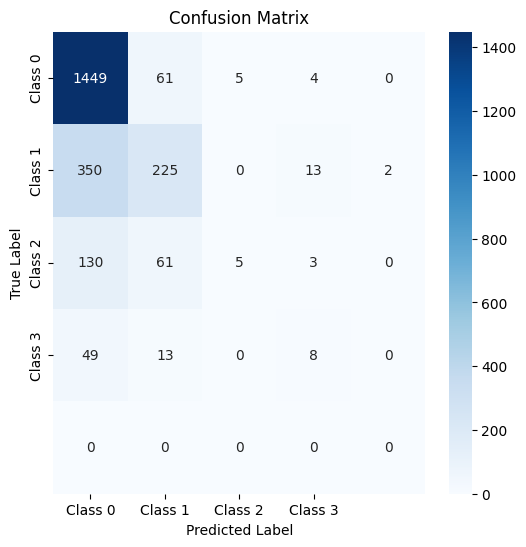

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# XGBoost

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# XGBoost를 MultiOutputClassifier로 래핑하여 다중 라벨 분류 수행
xgb_model = MultiOutputClassifier(XGBClassifier(eval_metric="logloss", random_state=42))

# 모델 학습
xgb_model.fit(X_train, Y_train)

# 예측 수행
Y_pred_xgb = xgb_model.predict(X_test)

# 정확도 평가 (각 라벨별 정확도 평균)
accuracy_xgb = np.mean([accuracy_score(Y_test[:, i], Y_pred_xgb[:, i]) for i in range(Y_test.shape[1])])
print(f"XGBoost Multi-Label Accuracy: {accuracy_xgb:.4f}")

XGBoost Multi-Label Accuracy: 0.7337


In [57]:
from sklearn.metrics import accuracy_score, f1_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

# XGBoost 모델 생성
xgb_model = MultiOutputClassifier(XGBClassifier(eval_metric="logloss"))

# 하이퍼파라미터 그리드 정의
xgb_param_grid = {
    "estimator__n_estimators": [50, 100, 200],
    "estimator__max_depth": [3, 5, 7],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__subsample": [0.7, 1.0],
    "estimator__colsample_bytree": [0.7, 1.0]
}

# GridSearchCV 설정
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# 모델 학습
xgb_grid.fit(X_train, Y_train)

# 최적 하이퍼파라미터 출력
print("Best XGBoost Parameters:", xgb_grid.best_params_)

# 최적 모델로 예측 수행
Y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)

# 성능 평가
accuracy = accuracy_score(Y_test, Y_pred_xgb)
f1 = f1_score(Y_test, Y_pred_xgb, average='macro')
hamming = hamming_loss(Y_test, Y_pred_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming:.4f}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits


C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.w

Best XGBoost Parameters: {'estimator__colsample_bytree': 0.7, 'estimator__learning_rate': 0.2, 'estimator__max_depth': 7, 'estimator__n_estimators': 200, 'estimator__subsample': 1.0}
Accuracy: 0.2355
F1-score: 0.7797
Hamming Loss: 0.2557


# LightGBM

In [55]:
type(X_train), X_train.shape

(numpy.ndarray, (5547, 816))

In [56]:
type(X_test), X_test.shape

(numpy.ndarray, (2378, 816))

In [54]:
# LightGBM을 MultiOutputClassifier로 래핑하여 다중 라벨 분류 수행
lgbm_model = MultiOutputClassifier(LGBMClassifier())

# 모델 학습
lgbm_model.fit(X_train, Y_train, feature_name="auto")

# 예측 수행
Y_pred_lgbm = lgbm_model.predict(X_test)

# 정확도 평가
accuracy_lgbm = np.mean([accuracy_score(Y_test[:, i], Y_pred_lgbm[:, i]) for i in range(Y_test.shape[1])])
print(f"LightGBM Multi-Label Accuracy: {accuracy_lgbm:.4f}")

[LightGBM] [Info] Number of positive: 3444, number of negative: 2103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208080
[LightGBM] [Info] Number of data points in the train set: 5547, number of used features: 816
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.620876 -> initscore=0.493269
[LightGBM] [Info] Start training from score 0.493269
[LightGBM] [Info] Number of positive: 2791, number of negative: 2756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031011 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 208080
[LightGBM] [Info] Number of data points in the train set: 5547, number of used features: 816
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503155 -> initscore=0.012620
[LightGBM] [Info] Start training from score 0.012620
[LightGBM] [Info

C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\dlow1\anaconda3\envs\team_project_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid featur

In [58]:
from lightgbm import LGBMClassifier

# LightGBM 모델 생성
lgbm_model = MultiOutputClassifier(LGBMClassifier())

# 하이퍼파라미터 그리드 정의
lgbm_param_grid = {
    "estimator__n_estimators": [50, 100, 200],
    "estimator__max_depth": [3, 5, 7],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__num_leaves": [20, 31, 40],
    "estimator__subsample": [0.7, 1.0],
    "estimator__colsample_bytree": [0.7, 1.0]
}

# GridSearchCV 설정
lgbm_grid = GridSearchCV(lgbm_model, lgbm_param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# 모델 학습
lgbm_grid.fit(X_train, Y_train)

# 최적 하이퍼파라미터 출력
print("Best LightGBM Parameters:", lgbm_grid.best_params_)

# 최적 모델로 예측 수행
Y_pred_lgbm = lgbm_grid.best_estimator_.predict(X_test)

# 성능 평가
accuracy = accuracy_score(Y_test, Y_pred_lgbm)
f1 = f1_score(Y_test, Y_pred_lgbm, average='macro')
hamming = hamming_loss(Y_test, Y_pred_lgbm)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Hamming Loss: {hamming:.4f}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits


KeyboardInterrupt: 